<a href="https://colab.research.google.com/github/SaidFlores22/Evaluacion/blob/main/Actividad_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 5**
## Said Arturo Flores Nieto
## A01703477

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
files.upload()

{}

In [4]:
españa = pd.read_csv('Girona_España.csv', encoding = "unicode_escape") 
mexico = pd.read_csv('DF_Mexico.csv', encoding = "unicode_escape", engine = 'python')
eua = pd.read_csv('California_EUA.csv', encoding = "unicode_escape")

## **ETAPA 1: Preprocesamiento de DATOS**

### **México**

#### ***Valores nulos***

Cantidad total de valores nulos

In [5]:
valores_nulos = mexico.isnull().sum().sum()
valores_nulos

189609

Separamos por tipo de dato

In [6]:
mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  float64
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  float64
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [7]:
mexico_o = mexico.select_dtypes(include=['object'])
mexico_i = mexico.select_dtypes(include=['int64'])
mexico_f = mexico.select_dtypes(include=['float'])

mexico_n = pd.concat([mexico_i, mexico_f],axis=1)

Datos numéricos

In [8]:
mexico_n

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,10531228,3,7,3,1,1125,0,19,49,324,...,NaN,4.95,4.71,4.95,5.00,4.95,5.00,4.86,NaN,0.19
1,16840050,3,3,2,3,1125,11,41,71,346,...,NaN,4.85,4.90,4.88,4.93,5.00,4.95,4.84,NaN,0.54
2,3531879,4,4,6,24,1125,0,0,0,87,...,NaN,4.57,4.82,4.71,4.92,4.92,4.58,4.71,NaN,0.31
3,153786,1,1,2,1,7,28,58,88,363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,196253,16,16,14,1,365,30,59,89,357,...,NaN,4.58,4.56,4.70,4.87,4.78,4.98,4.48,NaN,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,488030249,3,4,2,3,365,17,47,77,352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24220,506816029,1,1,7,1,365,30,60,90,365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24221,154670560,1,6,2,5,365,29,32,32,180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24222,7799414,13,13,2,1,365,9,39,69,344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
valores_nulos = mexico_n.isnull().sum()
valores_nulos

host_id                                             0
host_listings_count                                 0
host_total_listings_count                           0
accommodates                                        0
minimum_nights                                      0
maximum_nights                                      0
availability_30                                     0
availability_60                                     0
availability_90                                     0
availability_365                                    0
number_of_reviews                                   0
number_of_reviews_ltm                               0
number_of_reviews_l30d                              0
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
id                                                  0
scrape_id                   

*En el caso de todas las columnas de reseñas y calificaciones, con el fin de no afectar estas puntuaciones otorgando valores de 0, se pondra la mediana con el fin de que tampoco se afecte el análisis por valores atipicos. En los otros caso se sustituíran los valores nulos por 0*

In [10]:
mexico_n["review_scores_rating"] = mexico_n["review_scores_rating"].fillna(round(mexico_n["review_scores_rating"].median(),1))
mexico_n["review_scores_accuracy"] = mexico_n["review_scores_accuracy"].fillna(round(mexico_n["review_scores_accuracy"].median(),1))
mexico_n["review_scores_cleanliness"] = mexico_n["review_scores_cleanliness"].fillna(round(mexico_n["review_scores_cleanliness"].median(),1))
mexico_n["review_scores_checkin"] = mexico_n["review_scores_checkin"].fillna(round(mexico_n["review_scores_checkin"].median(),1))
mexico_n["review_scores_communication"] = mexico_n["review_scores_communication"].fillna(round(mexico_n["review_scores_communication"].median(),1))
mexico_n["review_scores_location"] = mexico_n["review_scores_location"].fillna(round(mexico_n["review_scores_location"].median(),1))
mexico_n["review_scores_value"] = mexico_n["review_scores_value"].fillna(round(mexico_n["review_scores_value"].median(),1))
mexico_n["reviews_per_month"] = mexico_n["reviews_per_month"].fillna(round(mexico_n["reviews_per_month"].median(),1))

In [11]:
mexico_n = mexico_n.fillna(0)

In [12]:
valores_nulos = mexico_n.isnull().sum()
valores_nulos

host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
id                                              0
scrape_id                                       0
host_response_rate                              0


In [13]:
mexico_n

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,10531228,3,7,3,1,1125,0,19,49,324,...,0.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.0,0.19
1,16840050,3,3,2,3,1125,11,41,71,346,...,0.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.0,0.54
2,3531879,4,4,6,24,1125,0,0,0,87,...,0.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.0,0.31
3,153786,1,1,2,1,7,28,58,88,363,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
4,196253,16,16,14,1,365,30,59,89,357,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,488030249,3,4,2,3,365,17,47,77,352,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24220,506816029,1,1,7,1,365,30,60,90,365,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24221,154670560,1,6,2,5,365,29,32,32,180,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24222,7799414,13,13,2,1,365,9,39,69,344,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10


Datos no numéricos

In [14]:
mexico_o.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,https://www.airbnb.com/rooms/2056638,30/03/2023,city scrape,Amplio y luminoso loft en CoyoacÃ¡n,CÃ³modo loft de dos pisos magnÃ­ficamente ubic...,NaN,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,09/12/2013,...,CoyoacÃ¡n,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",t,30/03/2023,03/01/2014,24/06/2018,f
1,https://www.airbnb.com/rooms/2072354,30/03/2023,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,MÃ³nica,16/06/2014,...,CoyoacÃ¡n,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",t,30/03/2023,01/01/2014,04/11/2022,f
2,https://www.airbnb.com/rooms/696037,29/03/2023,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,10/09/2012,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi – 38 Mbps"", ""Central air conditioning"",...",t,29/03/2023,31/10/2012,21/12/2022,f
3,https://www.airbnb.com/rooms/35797,29/03/2023,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,28/06/2010,...,Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",t,29/03/2023,NaN,NaN,f
4,https://www.airbnb.com/rooms/44616,30/03/2023,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,09/08/2010,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",t,30/03/2023,09/11/2011,26/03/2023,f


In [15]:
valores_nulos = mexico_o.isnull().sum()
valores_nulos

listing_url                   0
last_scraped                  0
source                        0
name                          1
description                 928
neighborhood_overview      9079
picture_url                   0
host_url                      0
host_name                     0
host_since                    0
host_location              5172
host_about                10664
host_response_time         3091
host_is_superhost             5
host_thumbnail_url            0
host_picture_url              0
host_neighbourhood        12401
host_verifications            0
host_has_profile_pic          0
host_identity_verified        0
neighbourhood              9079
neighbourhood_cleansed        0
property_type                 0
room_type                     0
bathrooms_text               30
amenities                     0
has_availability              0
calendar_last_scraped         0
first_review               3596
last_review                3596
instant_bookable              0
dtype: i

*En el caso de los valores no numericos, con el fin de identificar aquellos que no tienen registro, voy a sustituír los valores nulos por el string "--"*

In [16]:
mexico_o = mexico_o.fillna("--")

In [17]:
valores_nulos = mexico_o.isnull().sum()
valores_nulos

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
instant_bookable          0
dtype: int64

In [18]:
mexico_o.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,https://www.airbnb.com/rooms/2056638,30/03/2023,city scrape,Amplio y luminoso loft en CoyoacÃ¡n,CÃ³modo loft de dos pisos magnÃ­ficamente ubic...,--,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,09/12/2013,...,CoyoacÃ¡n,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",t,30/03/2023,03/01/2014,24/06/2018,f
1,https://www.airbnb.com/rooms/2072354,30/03/2023,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,MÃ³nica,16/06/2014,...,CoyoacÃ¡n,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",t,30/03/2023,01/01/2014,04/11/2022,f
2,https://www.airbnb.com/rooms/696037,29/03/2023,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,10/09/2012,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi – 38 Mbps"", ""Central air conditioning"",...",t,29/03/2023,31/10/2012,21/12/2022,f
3,https://www.airbnb.com/rooms/35797,29/03/2023,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,28/06/2010,...,Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",t,29/03/2023,--,--,f
4,https://www.airbnb.com/rooms/44616,30/03/2023,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,--,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,09/08/2010,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",t,30/03/2023,09/11/2011,26/03/2023,f


#### ***Valores atípicos***

<Figure size 1500x800 with 0 Axes>

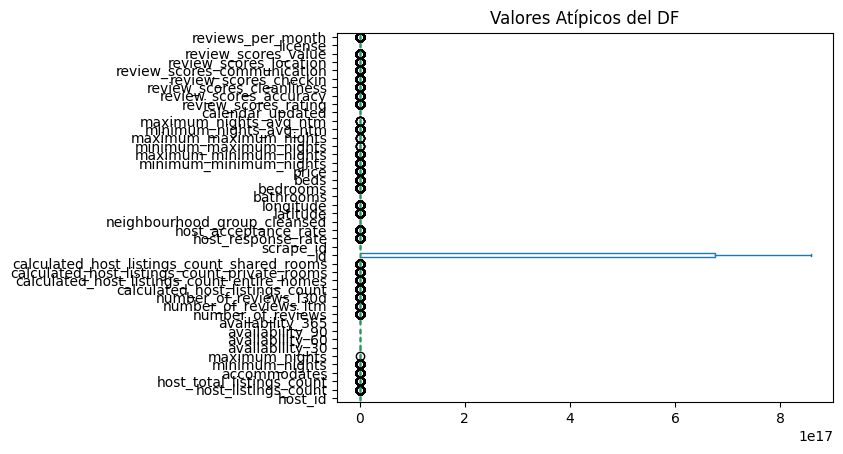

In [19]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
mexico_n.plot(kind='box', vert=False)
plt.title("Valores Atípicos del DF")
plt.show() #dibujamos el diagrama

*El box plot no se puede observar muy bien por la cantidad de datos, sin embargo utilizare el método de rango intercuartil, ya que además de ser un método más estricto para los valores atipicos, funciona mejor que el de desviación estandar con datos que no tienen una distribución normal, y en este caso al ser un data set tan grande es probable que muchos de los datos no tengan dicha distribución, por lo cual decidí utilizar el método ya mencionado.*

In [20]:
y=mexico_n
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido\n", Limite_Superior)
print("Limite inferior permitido\n", Limite_Inferior)

Limite superior permitido
 host_id                                         6.520127e+08
host_listings_count                             2.528303e+02
host_total_listings_count                       4.262030e+02
accommodates                                    9.933140e+00
minimum_nights                                  8.491454e+01
maximum_nights                                  2.018372e+03
availability_30                                 4.982418e+01
availability_60                                 1.013274e+02
availability_90                                 1.522572e+02
availability_365                                6.173025e+02
number_of_reviews                               2.261108e+02
number_of_reviews_ltm                           7.424966e+01
number_of_reviews_l30d                          6.890766e+00
calculated_host_listings_count                  1.091657e+02
calculated_host_listings_count_entire_homes     1.022059e+02
calculated_host_listings_count_private_rooms    1.937095e+

In [21]:
#Encontramos Ouliers del Dataframe
outliers= mexico_n[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
mexico_n_2= mexico_n[(y<=Limite_Superior)&(y>=Limite_Inferior)]
mexico_n_2

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,49,324,...,0.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.0,0.19
1,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,71,346,...,0.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.0,0.54
2,3531879,4.0,4.0,6.0,24.0,1125.0,0,0,0,87,...,0.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.0,0.31
3,153786,1.0,1.0,2.0,1.0,7.0,28,58,88,363,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
4,196253,16.0,16.0,NaN,1.0,365.0,30,59,89,357,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,488030249,3.0,4.0,2.0,3.0,365.0,17,47,77,352,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24220,506816029,1.0,1.0,7.0,1.0,365.0,30,60,90,365,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24221,154670560,1.0,6.0,2.0,5.0,365.0,29,32,32,180,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24222,7799414,13.0,13.0,2.0,1.0,365.0,9,39,69,344,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10


In [23]:
#Corroboramos valores nulos del dataframe4
valores_nulos=mexico_n_2.isnull().sum()
valores_nulos

host_id                                           0
host_listings_count                             521
host_total_listings_count                       489
accommodates                                    537
minimum_nights                                  178
maximum_nights                                    1
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_reviews                               564
number_of_reviews_ltm                           332
number_of_reviews_l30d                          454
calculated_host_listings_count                  266
calculated_host_listings_count_entire_homes     375
calculated_host_listings_count_private_rooms    516
calculated_host_listings_count_shared_rooms     199
id                                                0
scrape_id                                         0
host_respons

In [24]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_m=mexico_n_2.copy()
data_clean_m=data_clean_m.fillna(round(mexico_n_2.mean(),1))
data_clean_m

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,49,324,...,0.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.0,0.19
1,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,71,346,...,0.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.0,0.54
2,3531879,4.0,4.0,6.0,24.0,1125.0,0,0,0,87,...,0.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.0,0.31
3,153786,1.0,1.0,2.0,1.0,7.0,28,58,88,363,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
4,196253,16.0,16.0,3.1,1.0,365.0,30,59,89,357,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,488030249,3.0,4.0,2.0,3.0,365.0,17,47,77,352,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24220,506816029,1.0,1.0,7.0,1.0,365.0,30,60,90,365,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24221,154670560,1.0,6.0,2.0,5.0,365.0,29,32,32,180,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24222,7799414,13.0,13.0,2.0,1.0,365.0,9,39,69,344,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10


In [25]:
mexicof = pd.concat([data_clean_m, mexico_o], axis=1)
mexicof

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,49,324,...,CoyoacÃ¡n,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",t,30/03/2023,03/01/2014,24/06/2018,f
1,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,71,346,...,CoyoacÃ¡n,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",t,30/03/2023,01/01/2014,04/11/2022,f
2,3531879,4.0,4.0,6.0,24.0,1125.0,0,0,0,87,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi – 38 Mbps"", ""Central air conditioning"",...",t,29/03/2023,31/10/2012,21/12/2022,f
3,153786,1.0,1.0,2.0,1.0,7.0,28,58,88,363,...,Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",t,29/03/2023,--,--,f
4,196253,16.0,16.0,3.1,1.0,365.0,30,59,89,357,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",t,30/03/2023,09/11/2011,26/03/2023,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,488030249,3.0,4.0,2.0,3.0,365.0,17,47,77,352,...,Benito JuÃ¡rez,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",t,30/03/2023,--,--,f
24220,506816029,1.0,1.0,7.0,1.0,365.0,30,60,90,365,...,Iztacalco,Entire rental unit,Entire home/apt,1 bath,"[""Lake access"", ""Ski-in/Ski-out"", ""Wifi"", ""Out...",t,29/03/2023,--,--,t
24221,154670560,1.0,6.0,2.0,5.0,365.0,29,32,32,180,...,Benito JuÃ¡rez,Private room in home,Private room,2.5 shared baths,"[""Luggage dropoff allowed"", ""Shared patio or b...",t,29/03/2023,--,--,f
24222,7799414,13.0,13.0,2.0,1.0,365.0,9,39,69,344,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...",t,30/03/2023,--,--,t


In [26]:
valores_nulos=mexicof.isnull().sum().sum()
valores_nulos

0

### **España**

#### ***Valores nulos***

Cantidad total de valores nulos

In [27]:
valores_nulos = españa.isnull().sum().sum()
valores_nulos

174630

Separamos por tipo de dato

In [28]:
españa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19655 non-null  float64
 1   listing_url                                   19655 non-null  object 
 2   scrape_id                                     19655 non-null  float64
 3   last_scraped                                  19655 non-null  object 
 4   source                                        19655 non-null  object 
 5   name                                          19655 non-null  object 
 6   description                                   19632 non-null  object 
 7   neighborhood_overview                         8342 non-null   object 
 8   picture_url                                   19655 non-null  object 
 9   host_id                                       19655 non-null 

In [29]:
españa_o = españa.select_dtypes(include=['object'])
españa_i = españa.select_dtypes(include=['int64'])
españa_f = españa.select_dtypes(include=['float'])

españa_n = pd.concat([españa_i, españa_f],axis=1)

Datos numéricos

In [30]:
españa_n

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,57237,2,1,1125,0,0,18,293,56,15,...,1125.0,NaN,4.82,4.81,4.94,4.89,4.91,4.63,4.74,0.37
1,6586355,2,2,30,9,39,69,282,60,2,...,30.0,NaN,4.80,4.76,4.85,4.85,4.91,4.69,4.80,0.51
2,6620645,4,2,30,23,47,77,315,74,4,...,29.1,NaN,4.46,4.68,4.31,4.81,4.76,4.74,4.32,0.62
3,3680160,2,2,21,23,44,65,248,9,3,...,1125.0,NaN,4.88,4.75,4.50,4.86,5.00,4.63,4.50,0.08
4,180072,4,7,32,0,0,0,0,11,0,...,32.0,NaN,4.36,5.00,4.82,4.73,4.73,4.91,4.36,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,26281633,8,1,365,0,0,29,107,0,0,...,999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19651,444428600,4,3,365,30,60,90,186,0,0,...,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19652,491503593,4,7,60,29,59,89,269,0,0,...,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19653,389605038,4,1,365,28,58,88,273,0,0,...,999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
valores_nulos = españa_n.isnull().sum()
valores_nulos

host_id                                             0
accommodates                                        0
minimum_nights                                      0
maximum_nights                                      0
availability_30                                     0
availability_60                                     0
availability_90                                     0
availability_365                                    0
number_of_reviews                                   0
number_of_reviews_ltm                               0
number_of_reviews_l30d                              0
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
id                                                  0
scrape_id                                           0
host_response_rate                               2088
host_acceptance_rate        

*En el caso de todas las columnas de reseñas y calificaciones, con el fin de no afectar estas puntuaciones otorgando valores de 0, se pondra la mediana con el fin de que tampoco se afecte el análisis por valores atipicos. En los otros caso se sustituíran los valores nulos por 0*

In [32]:
españa_n["review_scores_rating"] = españa_n["review_scores_rating"].fillna(round(españa_n["review_scores_rating"].median(),1))
españa_n["review_scores_accuracy"] = españa_n["review_scores_accuracy"].fillna(round(españa_n["review_scores_accuracy"].median(),1))
españa_n["review_scores_cleanliness"] = españa_n["review_scores_cleanliness"].fillna(round(españa_n["review_scores_cleanliness"].median(),1))
españa_n["review_scores_checkin"] = españa_n["review_scores_checkin"].fillna(round(españa_n["review_scores_checkin"].median(),1))
españa_n["review_scores_communication"] = españa_n["review_scores_communication"].fillna(round(españa_n["review_scores_communication"].median(),1))
españa_n["review_scores_location"] = españa_n["review_scores_location"].fillna(round(españa_n["review_scores_location"].median(),1))
españa_n["review_scores_value"] = españa_n["review_scores_value"].fillna(round(españa_n["review_scores_value"].median(),1))
españa_n["reviews_per_month"] = españa_n["reviews_per_month"].fillna(round(españa_n["reviews_per_month"].median(),1))

In [33]:
españa_n = españa_n.fillna(0)

In [34]:
valores_nulos = españa_n.isnull().sum()
valores_nulos

host_id                                         0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
id                                              0
scrape_id                                       0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0


In [35]:
españa_n

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,57237,2,1,1125,0,0,18,293,56,15,...,1125.0,0.0,4.82,4.81,4.94,4.89,4.91,4.63,4.74,0.37
1,6586355,2,2,30,9,39,69,282,60,2,...,30.0,0.0,4.80,4.76,4.85,4.85,4.91,4.69,4.80,0.51
2,6620645,4,2,30,23,47,77,315,74,4,...,29.1,0.0,4.46,4.68,4.31,4.81,4.76,4.74,4.32,0.62
3,3680160,2,2,21,23,44,65,248,9,3,...,1125.0,0.0,4.88,4.75,4.50,4.86,5.00,4.63,4.50,0.08
4,180072,4,7,32,0,0,0,0,11,0,...,32.0,0.0,4.36,5.00,4.82,4.73,4.73,4.91,4.36,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,26281633,8,1,365,0,0,29,107,0,0,...,999.0,0.0,4.70,4.80,4.70,4.90,4.90,4.90,4.60,0.30
19651,444428600,4,3,365,30,60,90,186,0,0,...,1125.0,0.0,4.70,4.80,4.70,4.90,4.90,4.90,4.60,0.30
19652,491503593,4,7,60,29,59,89,269,0,0,...,60.0,0.0,4.70,4.80,4.70,4.90,4.90,4.90,4.60,0.30
19653,389605038,4,1,365,28,58,88,273,0,0,...,999.0,0.0,4.70,4.80,4.70,4.90,4.90,4.90,4.60,0.30


Datos no numéricos

In [36]:
españa_o.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,24/11/2009,...,Private room in condo,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,26/05/2013,...,Private room in loft,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",t,31/03/2023,01/08/2013,26/06/2022,NaN,f
2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,NaN,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,28/05/2013,...,Entire condo,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,10/06/2013,30/12/2022,NaN,f
3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,Roberto,26/09/2012,...,Private room in bed and breakfast,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,25/07/2010,...,Entire rental unit,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f


In [37]:
valores_nulos = españa_o.isnull().sum()
valores_nulos

listing_url                   0
last_scraped                  0
source                        0
name                          0
description                  23
neighborhood_overview     11313
picture_url                   0
host_url                      0
host_name                   117
host_since                  117
host_location              5559
host_about                 8424
host_response_time         2088
host_is_superhost            15
host_thumbnail_url          117
host_picture_url            117
host_neighbourhood        18386
host_verifications            0
host_has_profile_pic        117
host_identity_verified      117
neighbourhood             11313
neighbourhood_cleansed        0
property_type                 0
room_type                     0
bathrooms_text               16
amenities                     0
has_availability              0
calendar_last_scraped         0
first_review               5227
last_review                5227
license                    1135
instant_

*En el caso de los valores no numericos, con el fin de identificar aquellos que no tienen registro, voy a sustituír los valores nulos por el string "--"*

In [38]:
españa_o = españa_o.fillna("--")

In [39]:
valores_nulos = españa_o.isnull().sum()
valores_nulos

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
license                   0
instant_bookable          0
dtype: int64

In [40]:
españa_o.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,24/11/2009,...,Private room in condo,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,26/05/2013,...,Private room in loft,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",t,31/03/2023,01/08/2013,26/06/2022,--,f
2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,--,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,28/05/2013,...,Entire condo,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,10/06/2013,30/12/2022,--,f
3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,Roberto,26/09/2012,...,Private room in bed and breakfast,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,25/07/2010,...,Entire rental unit,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f


#### ***Valores atípicos***

<Figure size 1500x800 with 0 Axes>

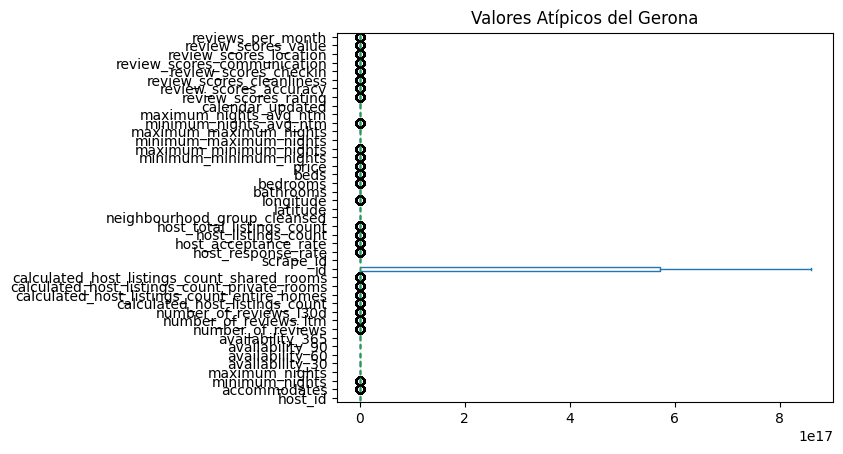

In [41]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
españa_n.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Gerona")
plt.show() #dibujamos el diagrama

*El box plot no se puede observar muy bien por la cantidad de datos, sin embargo utilizare el método de rango intercuartil, ya que además de ser un método más estricto para los valores atipicos, funciona mejor que el de desviación estandar con datos que no tienen una distribución normal, y en este caso al ser un data set tan grande es probable que muchos de los datos no tengan dicha distribución, por lo cual decidí utilizar el método ya mencionado.*

In [42]:
y=españa_n
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido\n", Limite_Superior)
print("Limite inferior permitido\n", Limite_Inferior)

Limite superior permitido
 host_id                                         5.776010e+08
accommodates                                    1.357642e+01
minimum_nights                                  6.165308e+01
maximum_nights                                  2.126503e+03
availability_30                                 5.065433e+01
availability_60                                 1.028997e+02
availability_90                                 1.500436e+02
availability_365                                5.290134e+02
number_of_reviews                               1.194857e+02
number_of_reviews_ltm                           3.067935e+01
number_of_reviews_l30d                          2.102141e+00
calculated_host_listings_count                  2.506332e+02
calculated_host_listings_count_entire_homes     2.425119e+02
calculated_host_listings_count_private_rooms    1.151000e+01
calculated_host_listings_count_shared_rooms     8.080682e-01
id                                              1.145727e+

In [43]:
#Encontramos Ouliers del Dataframe
outliers= españa_n[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
españa_n_2= españa_n[(y<=Limite_Superior)&(y>=Limite_Inferior)]
españa_n_2

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,57237,2.0,1.0,1125,0,0,18,293,56.0,15.0,...,1125.0,0.0,4.82,4.81,4.94,4.89,4.91,4.63,4.74,0.37
1,6586355,2.0,2.0,30,9,39,69,282,60.0,2.0,...,30.0,0.0,4.80,4.76,4.85,4.85,4.91,4.69,4.80,0.51
2,6620645,4.0,2.0,30,23,47,77,315,74.0,4.0,...,29.1,0.0,4.46,4.68,4.31,4.81,4.76,4.74,4.32,0.62
3,3680160,2.0,2.0,21,23,44,65,248,9.0,3.0,...,1125.0,0.0,4.88,4.75,4.50,4.86,5.00,4.63,4.50,0.08
4,180072,4.0,7.0,32,0,0,0,0,11.0,0.0,...,32.0,0.0,4.36,5.00,4.82,4.73,4.73,4.91,4.36,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,26281633,8.0,1.0,365,0,0,29,107,0.0,0.0,...,999.0,0.0,4.70,4.80,4.70,4.90,4.90,4.90,4.60,0.30
19651,444428600,4.0,3.0,365,30,60,90,186,0.0,0.0,...,1125.0,0.0,4.70,4.80,4.70,4.90,4.90,4.90,4.60,0.30
19652,491503593,4.0,7.0,60,29,59,89,269,0.0,0.0,...,60.0,0.0,4.70,4.80,4.70,4.90,4.90,4.90,4.60,0.30
19653,389605038,4.0,1.0,365,28,58,88,273,0.0,0.0,...,999.0,0.0,4.70,4.80,4.70,4.90,4.90,4.90,4.60,0.30


In [45]:
#Corroboramos valores nulos del dataframe4
valores_nulos=españa_n_2.isnull().sum()
valores_nulos

host_id                                           0
accommodates                                    485
minimum_nights                                   29
maximum_nights                                    0
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_reviews                               379
number_of_reviews_ltm                           398
number_of_reviews_l30d                          326
calculated_host_listings_count                  405
calculated_host_listings_count_entire_homes     405
calculated_host_listings_count_private_rooms    671
calculated_host_listings_count_shared_rooms     181
id                                                0
scrape_id                                         0
host_response_rate                                0
host_acceptance_rate                              0
host_listing

In [46]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_e=españa_n_2.copy()
data_clean_e=data_clean_e.fillna(round(españa_n_2.mean(),1))
data_clean_e

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,57237,2.0,1.0,1125,0,0,18,293,56.0,15.0,...,1125.0,0.0,4.82,4.81,4.94,4.89,4.91,4.63,4.74,0.37
1,6586355,2.0,2.0,30,9,39,69,282,60.0,2.0,...,30.0,0.0,4.80,4.76,4.85,4.85,4.91,4.69,4.80,0.51
2,6620645,4.0,2.0,30,23,47,77,315,74.0,4.0,...,29.1,0.0,4.46,4.68,4.31,4.81,4.76,4.74,4.32,0.62
3,3680160,2.0,2.0,21,23,44,65,248,9.0,3.0,...,1125.0,0.0,4.88,4.75,4.50,4.86,5.00,4.63,4.50,0.08
4,180072,4.0,7.0,32,0,0,0,0,11.0,0.0,...,32.0,0.0,4.36,5.00,4.82,4.73,4.73,4.91,4.36,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,26281633,8.0,1.0,365,0,0,29,107,0.0,0.0,...,999.0,0.0,4.70,4.80,4.70,4.90,4.90,4.90,4.60,0.30
19651,444428600,4.0,3.0,365,30,60,90,186,0.0,0.0,...,1125.0,0.0,4.70,4.80,4.70,4.90,4.90,4.90,4.60,0.30
19652,491503593,4.0,7.0,60,29,59,89,269,0.0,0.0,...,60.0,0.0,4.70,4.80,4.70,4.90,4.90,4.90,4.60,0.30
19653,389605038,4.0,1.0,365,28,58,88,273,0.0,0.0,...,999.0,0.0,4.70,4.80,4.70,4.90,4.90,4.90,4.60,0.30


In [47]:
españaf = pd.concat([data_clean_e, españa_o], axis=1)
españaf

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,57237,2.0,1.0,1125,0,0,18,293,56.0,15.0,...,Private room in condo,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,6586355,2.0,2.0,30,9,39,69,282,60.0,2.0,...,Private room in loft,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",t,31/03/2023,01/08/2013,26/06/2022,--,f
2,6620645,4.0,2.0,30,23,47,77,315,74.0,4.0,...,Entire condo,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,10/06/2013,30/12/2022,--,f
3,3680160,2.0,2.0,21,23,44,65,248,9.0,3.0,...,Private room in bed and breakfast,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
4,180072,4.0,7.0,32,0,0,0,0,11.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,26281633,8.0,1.0,365,0,0,29,107,0.0,0.0,...,Entire home,Entire home/apt,5 baths,"[""Pets allowed"", ""Smoking allowed"", ""Essentials""]",t,01/04/2023,--,--,HUTG-001292,t
19651,444428600,4.0,3.0,365,30,60,90,186,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Pets allowed"", ""Washer""]",t,01/04/2023,--,--,HUTG019727,t
19652,491503593,4.0,7.0,60,29,59,89,269,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Free street parking"", ""Washer"", ""...",t,01/04/2023,--,--,HUTG-057830,f
19653,389605038,4.0,1.0,365,28,58,88,273,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Refrigerator"", ""Microwave"", ""Elevator"", ""Pet...",t,01/04/2023,--,--,HUTG-065236,t


In [48]:
valores_nulos=españaf.isnull().sum().sum()
valores_nulos

0

### **EUA**

#### ***Valores nulos***

Cantidad total de valores nulos

In [49]:
valores_nulos = eua.isnull().sum().sum()
valores_nulos

48877

Separamos por tipo de dato

In [50]:
eua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿id                                         6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [51]:
eua_o = eua.select_dtypes(include=['object'])
eua_i = eua.select_dtypes(include=['int64'])
eua_f = eua.select_dtypes(include=['float'])

eua_n = pd.concat([eua_i, eua_f],axis=1)

Datos numéricos

In [52]:
eua_n

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1169,1,1,3,2,30,8,22,30,128,...,1125.0,NaN,4.87,4.93,4.92,4.95,4.88,4.98,4.76,2.31
1,8904,2,2,4,30,60,30,60,90,365,...,60.0,NaN,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.66
2,21994,13,14,1,32,90,30,60,90,365,...,90.0,NaN,4.67,4.44,4.44,4.78,4.78,4.67,4.67,0.09
3,24215,2,6,4,9,91,30,60,90,365,...,91.0,NaN,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
4,7149,2,2,3,1,26,16,45,75,159,...,26.0,NaN,4.91,4.94,4.94,4.95,4.96,4.93,4.74,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,495900269,9,9,2,1,28,14,34,56,57,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6932,499392537,1,1,2,1,7,25,52,82,356,...,1125.0,NaN,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
6933,499294716,1,1,1,31,60,29,59,89,364,...,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6934,485596413,3,4,2,1,7,30,60,90,179,...,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
valores_nulos = eua_n.isnull().sum()
valores_nulos

host_id                                            0
host_listings_count                                0
host_total_listings_count                          0
accommodates                                       0
minimum_nights                                     0
maximum_nights                                     0
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                                   0
number_of_reviews                                  0
number_of_reviews_ltm                              0
number_of_reviews_l30d                             0
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
ï»¿id                                              0
scrape_id                                     

*En el caso de todas las columnas de reseñas y calificaciones, con el fin de no afectar estas puntuaciones otorgando valores de 0, se pondra la mediana con el fin de que tampoco se afecte el análisis por valores atipicos. En los otros caso se sustituíran los valores nulos por 0*

In [54]:
eua_n["review_scores_rating"] = eua_n["review_scores_rating"].fillna(round(eua_n["review_scores_rating"].median(),1))
eua_n["review_scores_accuracy"] = eua_n["review_scores_accuracy"].fillna(round(eua_n["review_scores_accuracy"].median(),1))
eua_n["review_scores_cleanliness"] = eua_n["review_scores_cleanliness"].fillna(round(eua_n["review_scores_cleanliness"].median(),1))
eua_n["review_scores_checkin"] = eua_n["review_scores_checkin"].fillna(round(eua_n["review_scores_checkin"].median(),1))
eua_n["review_scores_communication"] = eua_n["review_scores_communication"].fillna(round(eua_n["review_scores_communication"].median(),1))
eua_n["review_scores_location"] = eua_n["review_scores_location"].fillna(round(eua_n["review_scores_location"].median(),1))
eua_n["review_scores_value"] = eua_n["review_scores_value"].fillna(round(eua_n["review_scores_value"].median(),1))
eua_n["reviews_per_month"] = eua_n["reviews_per_month"].fillna(round(eua_n["reviews_per_month"].median(),1))

In [55]:
eua_n = eua_n.fillna(0)

In [56]:
valores_nulos = eua_n.isnull().sum()
valores_nulos

host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
ï»¿id                                           0
scrape_id                                       0
host_response_rate                              0


In [57]:
eua_n

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1169,1,1,3,2,30,8,22,30,128,...,1125.0,0.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,2.31
1,8904,2,2,4,30,60,30,60,90,365,...,60.0,0.0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.66
2,21994,13,14,1,32,90,30,60,90,365,...,90.0,0.0,4.67,4.44,4.44,4.78,4.78,4.67,4.67,0.09
3,24215,2,6,4,9,91,30,60,90,365,...,91.0,0.0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
4,7149,2,2,3,1,26,16,45,75,159,...,26.0,0.0,4.91,4.94,4.94,4.95,4.96,4.93,4.74,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,495900269,9,9,2,1,28,14,34,56,57,...,28.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60
6932,499392537,1,1,2,1,7,25,52,82,356,...,1125.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
6933,499294716,1,1,1,31,60,29,59,89,364,...,60.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60
6934,485596413,3,4,2,1,7,30,60,90,179,...,1125.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60


Datos no numéricos

In [58]:
eua_o.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,...,Entire serviced apartment,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,...,Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,03/05/2009,06/08/2017,NaN,f
2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,...,Private room in rental unit,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,NaN,f
3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,02/07/2009,...,Entire condo,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,27/01/2009,...,Private room in condo,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f


In [59]:
valores_nulos = eua_o.isnull().sum()
valores_nulos

listing_url                  0
last_scraped                 0
source                       0
name                         0
description                 47
neighborhood_overview     2086
picture_url                  0
host_url                     0
host_name                    0
host_since                   0
host_location             1221
host_about                2252
host_response_time        1019
host_is_superhost            9
host_thumbnail_url           0
host_picture_url             0
host_neighbourhood         301
host_verifications           0
host_has_profile_pic         0
host_identity_verified       0
neighbourhood             2086
neighbourhood_cleansed       0
property_type                0
room_type                    0
bathrooms_text              14
amenities                    0
has_availability             0
calendar_last_scraped        0
first_review              1325
last_review               1325
license                   2758
instant_bookable             0
dtype: i

*En el caso de los valores no numericos, con el fin de identificar aquellos que no tienen registro, voy a sustituír los valores nulos por el string "--"*

In [60]:
eua_o = eua_o.fillna("--")

In [61]:
valores_nulos = eua_o.isnull().sum()
valores_nulos

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
license                   0
instant_bookable          0
dtype: int64

In [62]:
eua_o.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,...,Entire serviced apartment,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,...,Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,03/05/2009,06/08/2017,--,f
2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,...,Private room in rental unit,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,--,f
3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,--,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,02/07/2009,...,Entire condo,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,27/01/2009,...,Private room in condo,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f


#### ***Valores atípicos***

<Figure size 1500x800 with 0 Axes>

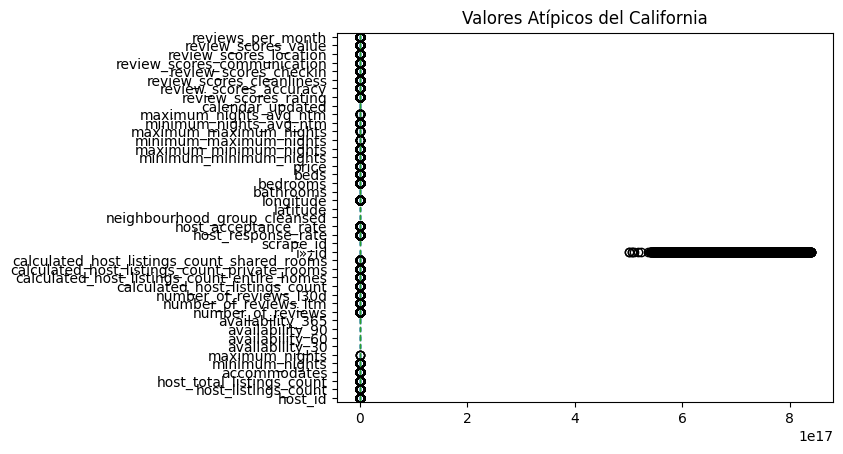

In [63]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
eua_n.plot(kind='box', vert=False)
plt.title("Valores Atípicos del California")
plt.show() #dibujamos el diagrama

*El box plot no se puede observar muy bien por la cantidad de datos, sin embargo utilizare el método de rango intercuartil, ya que además de ser un método más estricto para los valores atipicos, funciona mejor que el de desviación estandar con datos que no tienen una distribución normal, y en este caso al ser un data set tan grande es probable que muchos de los datos no tengan dicha distribución, por lo cual decidí utilizar el método ya mencionado.*

In [64]:
y=eua_n
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido\n", Limite_Superior)
print("Limite inferior permitido\n", Limite_Inferior)

Limite superior permitido
 host_id                                         5.371002e+08
host_listings_count                             2.300397e+03
host_total_listings_count                       2.842239e+03
accommodates                                    9.034994e+00
minimum_nights                                  1.755102e+02
maximum_nights                                  3.662171e+04
availability_30                                 4.639164e+01
availability_60                                 9.577126e+01
availability_90                                 1.465721e+02
availability_365                                5.574500e+02
number_of_reviews                               3.315465e+02
number_of_reviews_ltm                           7.831711e+01
number_of_reviews_l30d                          5.179824e+00
calculated_host_listings_count                  1.046359e+02
calculated_host_listings_count_entire_homes     9.811532e+01
calculated_host_listings_count_private_rooms    3.221346e+

In [65]:
#Encontramos Ouliers del Dataframe
outliers= eua_n[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
eua_n_2= eua_n[(y<=Limite_Superior)&(y>=Limite_Inferior)]
eua_n_2

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1169,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,1125.0,0.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,2.31
1,8904,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,60.0,0.0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.66
2,21994,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,90.0,0.0,4.67,4.44,4.44,4.78,4.78,4.67,4.67,0.09
3,24215,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,91.0,0.0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
4,7149,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,26.0,0.0,4.91,4.94,4.94,4.95,4.96,4.93,4.74,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,495900269,9.0,9.0,2.0,1.0,28.0,14,34,56,57,...,28.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60
6932,499392537,1.0,1.0,2.0,1.0,7.0,25,52,82,356,...,1125.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
6933,499294716,1.0,1.0,1.0,31.0,60.0,29,59,89,364,...,60.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60
6934,485596413,3.0,4.0,2.0,1.0,7.0,30,60,90,179,...,1125.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60


In [67]:
#Corroboramos valores nulos del dataframe4
valores_nulos=eua_n_2.isnull().sum()
valores_nulos

host_id                                           0
host_listings_count                             204
host_total_listings_count                       161
accommodates                                     85
minimum_nights                                  132
maximum_nights                                    1
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_reviews                               194
number_of_reviews_ltm                           103
number_of_reviews_l30d                          129
calculated_host_listings_count                  292
calculated_host_listings_count_entire_homes     292
calculated_host_listings_count_private_rooms    236
calculated_host_listings_count_shared_rooms      52
ï»¿id                                             0
scrape_id                                         0
host_respons

In [68]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_eua=eua_n_2.copy()
data_clean_eua=data_clean_eua.fillna(round(eua_n_2.mean(),1))
data_clean_eua

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1169,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,1125.0,0.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,2.31
1,8904,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,60.0,0.0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.66
2,21994,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,90.0,0.0,4.67,4.44,4.44,4.78,4.78,4.67,4.67,0.09
3,24215,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,91.0,0.0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
4,7149,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,26.0,0.0,4.91,4.94,4.94,4.95,4.96,4.93,4.74,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,495900269,9.0,9.0,2.0,1.0,28.0,14,34,56,57,...,28.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60
6932,499392537,1.0,1.0,2.0,1.0,7.0,25,52,82,356,...,1125.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
6933,499294716,1.0,1.0,1.0,31.0,60.0,29,59,89,364,...,60.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60
6934,485596413,3.0,4.0,2.0,1.0,7.0,30,60,90,179,...,1125.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60


In [69]:
euaf = pd.concat([data_clean_eua, eua_o], axis=1)
euaf

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1169,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,Entire serviced apartment,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,8904,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,03/05/2009,06/08/2017,--,f
2,21994,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,Private room in rental unit,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,--,f
3,24215,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,Entire condo,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,7149,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,Private room in condo,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,495900269,9.0,9.0,2.0,1.0,28.0,14,34,56,57,...,Entire rental unit,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,--,--,147904,t
6932,499392537,1.0,1.0,2.0,1.0,7.0,25,52,82,356,...,Entire rental unit,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f
6933,499294716,1.0,1.0,1.0,31.0,60.0,29,59,89,364,...,Private room in rental unit,Private room,1 shared bath,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",t,06/03/2023,--,--,--,f
6934,485596413,3.0,4.0,2.0,1.0,7.0,30,60,90,179,...,Private room in home,Private room,1 shared bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Centr...",t,06/03/2023,--,--,2022-012562STR,f


In [70]:
valores_nulos=euaf.isnull().sum().sum()
valores_nulos

0

### **Crear CSV y descargar archivos**

In [71]:
from google.colab import files 

mexicof.to_csv("DF_Mexico_sn_y_sa.csv", encoding='unicode_escape')
españaf.to_csv("Girona_España_sn_y_sa.csv")
euaf.to_csv("California_EUA_sn_y_sa.csv")

In [ ]:
files.download("DF_Mexico_sn_y_sa.csv")
files.download("Girona_España_sn_y_sa.csv")
files.download("California_EUA_sn_y_sa.csv")

## **ETAPA 2: Extracción  de DATOS**

### **México**

**a) host_acceptance_rate> 50%**

In [73]:
mex_a= mexicof[mexicof['host_acceptance_rate'] > .5]

mex_a

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
2,3531879,4.0,4.0,6.0,24.0,1125.0,0,0,0,87,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi – 38 Mbps"", ""Central air conditioning"",...",t,29/03/2023,31/10/2012,21/12/2022,f
4,196253,16.0,16.0,3.1,1.0,365.0,30,59,89,357,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",t,30/03/2023,09/11/2011,26/03/2023,f
5,2339771,1.0,2.0,2.0,2.0,30.0,2,13,19,240,...,CuauhtÃ©moc,Entire loft,Entire home/apt,2 baths,"[""BBQ grill"", ""Luggage dropoff allowed"", ""TV w...",t,29/03/2023,05/02/2014,27/02/2023,f
6,265650,2.0,6.0,2.0,3.0,250.0,0,0,0,144,...,CuauhtÃ©moc,Entire condo,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Long term stays a...",t,29/03/2023,02/04/2011,21/01/2023,f
7,299558,2.0,3.0,2.0,2.0,1125.0,18,48,78,168,...,CuauhtÃ©moc,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",t,30/03/2023,01/11/2017,31/12/2022,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24218,506810572,4.0,4.0,2.0,1.0,365.0,29,59,89,364,...,Iztacalco,Private room in home,Private room,1 shared bath,"[""Wifi"", ""Washer"", ""Pets allowed"", ""Outdoor sh...",t,29/03/2023,--,--,t
24219,488030249,3.0,4.0,2.0,3.0,365.0,17,47,77,352,...,Benito JuÃ¡rez,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",t,30/03/2023,--,--,f
24221,154670560,1.0,6.0,2.0,5.0,365.0,29,32,32,180,...,Benito JuÃ¡rez,Private room in home,Private room,2.5 shared baths,"[""Luggage dropoff allowed"", ""Shared patio or b...",t,29/03/2023,--,--,f
24222,7799414,13.0,13.0,2.0,1.0,365.0,9,39,69,344,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...",t,30/03/2023,--,--,t


**b) Sólo los registros con categoría “superhost”**

In [74]:
mex_b= mexicof[mexicof['host_is_superhost'] == "t"]
mex_b

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
2,3531879,4.0,4.0,6.0,24.0,1125.0,0,0,0,87,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi – 38 Mbps"", ""Central air conditioning"",...",t,29/03/2023,31/10/2012,21/12/2022,f
6,265650,2.0,6.0,2.0,3.0,250.0,0,0,0,144,...,CuauhtÃ©moc,Entire condo,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Long term stays a...",t,29/03/2023,02/04/2011,21/01/2023,f
7,299558,2.0,3.0,2.0,2.0,1125.0,18,48,78,168,...,CuauhtÃ©moc,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",t,30/03/2023,01/11/2017,31/12/2022,f
8,2872228,13.0,14.0,2.0,2.0,60.0,25,42,66,156,...,CuauhtÃ©moc,Entire condo,Entire home/apt,1 bath,"[""Ethernet connection"", ""TV with standard cabl...",t,29/03/2023,21/08/2013,27/02/2023,f
9,3777702,6.0,7.0,3.1,1.0,90.0,9,15,37,270,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""TV with standard cabl...",t,29/03/2023,31/10/2012,17/02/2023,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24171,333035396,73.0,73.0,6.0,1.0,365.0,28,58,88,362,...,Benito JuÃ¡rez,Entire rental unit,Entire home/apt,2 baths,"[""Smoke alarm"", ""Single level home"", ""Long ter...",t,30/03/2023,--,--,t
24179,10764020,11.4,14.3,2.0,1.0,365.0,29,55,85,360,...,Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Smoke alarm"", ""Hot water kettle"", ""Luggage d...",t,30/03/2023,--,--,f
24191,420886866,2.0,2.0,4.0,2.0,365.0,29,59,89,364,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Kitchen"", ""TV"", ""Carb...",t,30/03/2023,--,--,f
24203,8905097,35.0,48.0,4.0,1.0,365.0,11,33,63,307,...,Ãlvaro ObregÃ³n,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Pets allowed"", ""Self ...",t,30/03/2023,--,--,t


**c) Los registros que no hallan verificado identidad “ not identity_verified”**

In [75]:
mex_c= mexicof[mexicof['host_identity_verified'] == "f"]
mex_c

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,49,324,...,CoyoacÃ¡n,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",t,30/03/2023,03/01/2014,24/06/2018,f
21,647454,3.0,4.0,2.0,1.0,730.0,28,58,88,88,...,CoyoacÃ¡n,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",t,29/03/2023,--,--,f
61,1444589,1.0,1.0,2.0,7.0,365.0,0,0,0,0,...,Iztacalco,Entire rental unit,Entire home/apt,1 bath,"[""Elevator"", ""Wifi"", ""Washer"", ""Kitchen"", ""Poo...",f,30/03/2023,--,--,f
68,1511568,1.0,1.0,1.0,2.0,14.0,30,60,90,365,...,Benito JuÃ¡rez,Private room in rental unit,Private room,1 bath,"[""Kitchen"", ""Smoking allowed"", ""Dryer"", ""Washer""]",t,30/03/2023,--,--,f
70,1539548,1.0,3.0,4.0,3.0,180.0,0,0,0,0,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,2 baths,"[""Elevator"", ""Wifi"", ""Oven"", ""Iron"", ""Washer"",...",t,30/03/2023,19/04/2012,03/11/2019,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23695,13667851,2.0,2.0,1.0,1.0,365.0,28,58,88,363,...,CoyoacÃ¡n,Private room in home,Private room,1.5 shared baths,"[""Wifi"", ""Kitchen"", ""Lock on bedroom door"", ""H...",t,29/03/2023,--,--,f
23873,487627497,17.0,19.0,4.0,2.0,365.0,22,52,82,356,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Hot water kettle"", ""Luggage d...",t,30/03/2023,--,--,t
23965,408076348,3.0,3.0,2.0,1.0,365.0,29,59,89,276,...,CuauhtÃ©moc,Private room in bed and breakfast,Private room,1 private bath,"[""Dedicated workspace"", ""Smoke alarm"", ""Wifi"",...",f,30/03/2023,--,--,f
23966,408076348,3.0,3.0,2.0,1.0,365.0,29,59,89,276,...,CuauhtÃ©moc,Private room in bed and breakfast,Private room,1 private bath,"[""Dedicated workspace"", ""Smoke alarm"", ""Wifi"",...",f,30/03/2023,--,--,f


**d) Los registro cuyo property_type = “Private room” y “Hotel room”**

In [76]:
mex_d= mexicof[(mexicof['property_type'] == "Private room") | (mexicof['property_type'] == "Room in hotel")]
mex_d

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
21,647454,3.0,4.0,2.0,1.0,730.0,28,58,88,88,...,CoyoacÃ¡n,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",t,29/03/2023,--,--,f
1062,2556582,1.0,1.0,2.0,2.0,1125.0,30,60,90,365,...,Iztacalco,Private room,Private room,1 private bath,"[""Ethernet connection"", ""Smoke alarm"", ""Free s...",t,29/03/2023,23/05/2017,21/11/2022,f
1972,111031291,4.0,4.0,2.0,1.0,1125.0,30,60,90,365,...,CuauhtÃ©moc,Room in hotel,Private room,1 private bath,"[""Smoke alarm"", ""Flo body soap"", ""Flo shampoo""...",t,29/03/2023,18/02/2018,12/03/2023,t
2670,136125882,1.0,2.0,1.0,1.0,1125.0,23,53,83,358,...,CoyoacÃ¡n,Private room,Private room,1 shared bath,"[""Wifi"", ""Breakfast"", ""Washer"", ""Smoking allow...",t,29/03/2023,26/02/2023,26/02/2023,t
2805,142841816,1.0,1.0,2.0,1.0,1125.0,0,0,0,27,...,La Magdalena Contreras,Private room,Private room,2 shared baths,"[""Elevator"", ""Extra pillows and blankets"", ""Et...",t,29/03/2023,10/08/2017,07/03/2023,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23774,253044186,15.0,16.0,2.0,1.0,365.0,30,60,90,365,...,Benito JuÃ¡rez,Room in hotel,Private room,1 private bath,"[""Wifi"", ""Fire extinguisher"", ""Lock on bedroom...",t,29/03/2023,--,--,t
23884,501218890,14.0,16.0,2.0,1.0,365.0,29,57,87,362,...,Miguel Hidalgo,Room in hotel,Private room,1 private bath,"[""Luggage dropoff allowed"", ""Conditioner"", ""Wi...",t,30/03/2023,--,--,t
23885,501218890,14.0,16.0,2.0,1.0,365.0,26,52,82,357,...,Miguel Hidalgo,Room in hotel,Private room,1 private bath,"[""Luggage dropoff allowed"", ""Conditioner"", ""Wi...",t,30/03/2023,--,--,t
23916,160473638,3.0,3.0,2.0,2.0,365.0,0,28,58,333,...,CuauhtÃ©moc,Room in hotel,Private room,1 private bath,"[""Ethernet connection"", ""Shared patio or balco...",t,30/03/2023,--,--,f


**e) Los registros que cuenten con bathroom > 1**

In [77]:
mex_e= mexicof[(mexicof['bathrooms_text'] != "0 baths") & (mexicof['bathrooms_text'] != "0 shared baths") & (mexicof['bathrooms_text'] != "1 bath") & (mexicof['bathrooms_text'] != "1 private bath") & (mexicof['bathrooms_text'] != "1 shared bath") & (mexicof['bathrooms_text'] != "Half-bath") & (mexicof['bathrooms_text'] != "Shared half-bath") & (mexicof['bathrooms_text'] != "Private half-bath") & (mexicof['bathrooms_text'] != "--")]
mex_e

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,49,324,...,CoyoacÃ¡n,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",t,30/03/2023,03/01/2014,24/06/2018,f
2,3531879,4.0,4.0,6.0,24.0,1125.0,0,0,0,87,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi – 38 Mbps"", ""Central air conditioning"",...",t,29/03/2023,31/10/2012,21/12/2022,f
4,196253,16.0,16.0,3.1,1.0,365.0,30,59,89,357,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",t,30/03/2023,09/11/2011,26/03/2023,f
5,2339771,1.0,2.0,2.0,2.0,30.0,2,13,19,240,...,CuauhtÃ©moc,Entire loft,Entire home/apt,2 baths,"[""BBQ grill"", ""Luggage dropoff allowed"", ""TV w...",t,29/03/2023,05/02/2014,27/02/2023,f
9,3777702,6.0,7.0,3.1,1.0,90.0,9,15,37,270,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""TV with standard cabl...",t,29/03/2023,31/10/2012,17/02/2023,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24194,499836247,6.0,6.0,6.0,1.0,365.0,8,38,68,343,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,2 baths,"[""Dedicated workspace"", ""Smoke alarm"", ""Wifi"",...",t,30/03/2023,--,--,t
24196,396911095,1.0,2.0,2.0,1.0,365.0,26,56,86,361,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Smoke alarm"", ""BBQ grill"", ""Wine glasses"", ""...",t,30/03/2023,--,--,f
24206,445250346,4.0,4.0,6.0,3.0,365.0,30,60,90,365,...,CuauhtÃ©moc,Entire home,Entire home/apt,2 baths,"[""Stainless steel oven"", ""Ethernet connection""...",t,30/03/2023,--,--,t
24210,155903047,1.0,1.0,4.0,1.0,365.0,30,60,90,364,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2.5 baths,"[""Wifi"", ""Fire extinguisher"", ""Kitchen"", ""TV"",...",t,30/03/2023,--,--,t


**f) Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”**

In [78]:
mex_f= mexicof[(mexicof['price'] > 10000) & (mexicof['property_type'] == "Entire home")]
mex_f

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
4,196253,16.0,16.0,3.1,1.0,365.0,30,59,89,357,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",t,30/03/2023,09/11/2011,26/03/2023,f
1524,96060539,7.0,9.0,3.1,2.0,20.0,24,44,74,345,...,CoyoacÃ¡n,Entire home,Entire home/apt,7 baths,"[""Smoke alarm"", ""Free street parking"", ""Luggag...",t,30/03/2023,20/03/2018,20/02/2023,f
1855,102373818,7.0,11.0,7.0,1.0,1000.0,30,60,90,365,...,CoyoacÃ¡n,Entire home,Entire home/apt,2.5 baths,"[""Free street parking"", ""Luggage dropoff allow...",t,30/03/2023,08/01/2017,03/12/2022,f
3269,451382726,9.0,9.0,3.1,2.0,1125.0,11,23,43,160,...,CuauhtÃ©moc,Entire home,Entire home/apt,8.5 baths,"[""Loredana body soap"", ""Smoke alarm"", ""BBQ gri...",t,30/03/2023,21/11/2017,24/03/2023,t
3452,8995867,17.0,18.0,3.1,2.0,1125.0,23,51,81,163,...,CuauhtÃ©moc,Entire home,Entire home/apt,5 baths,"[""Ethernet connection"", ""Smoke alarm"", ""Free s...",t,30/03/2023,28/05/2018,06/03/2023,t
3491,8961760,15.0,16.0,3.1,1.0,1125.0,22,50,80,143,...,CuauhtÃ©moc,Entire home,Entire home/apt,5 baths,"[""Smoke alarm"", ""Free street parking"", ""BBQ gr...",t,30/03/2023,19/02/2018,26/02/2023,t
4502,203356079,1.0,1.0,6.0,2.0,3.0,29,59,89,89,...,CuauhtÃ©moc,Entire home,Entire home/apt,2.5 baths,"[""Cervin wega sound system"", ""Wifi"", ""Hot tub""...",t,29/03/2023,--,--,f
4716,34040390,21.0,22.0,3.1,1.0,1125.0,0,1,7,180,...,CuauhtÃ©moc,Entire home,Entire home/apt,14 baths,"[""Smoke alarm"", ""Dryer – In unit"", ""Luggage dr...",t,30/03/2023,03/12/2019,20/03/2023,t
5305,207171317,2.0,3.0,6.0,2.0,1125.0,0,0,0,87,...,Cuajimalpa de Morelos,Entire home,Entire home/apt,5 baths,"[""Ethernet connection"", ""Smoke alarm"", ""BBQ gr...",t,29/03/2023,--,--,t
6373,252901192,6.0,6.0,3.1,2.0,30.0,16,38,62,333,...,CuauhtÃ©moc,Entire home,Entire home/apt,6.5 baths,"[""Smoke alarm"", ""42"" TV with Netflix"", ""Free s...",t,30/03/2023,21/05/2019,26/03/2023,f


**g) Los registros cuyo review_scores_cleanliness > 4.5**

In [79]:
mex_g= mexicof[mexicof['review_scores_cleanliness'] > 4.5]
mex_g

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,49,324,...,CoyoacÃ¡n,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",t,30/03/2023,03/01/2014,24/06/2018,f
1,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,71,346,...,CoyoacÃ¡n,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",t,30/03/2023,01/01/2014,04/11/2022,f
2,3531879,4.0,4.0,6.0,24.0,1125.0,0,0,0,87,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi – 38 Mbps"", ""Central air conditioning"",...",t,29/03/2023,31/10/2012,21/12/2022,f
3,153786,1.0,1.0,2.0,1.0,7.0,28,58,88,363,...,Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",t,29/03/2023,--,--,f
4,196253,16.0,16.0,3.1,1.0,365.0,30,59,89,357,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",t,30/03/2023,09/11/2011,26/03/2023,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,488030249,3.0,4.0,2.0,3.0,365.0,17,47,77,352,...,Benito JuÃ¡rez,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",t,30/03/2023,--,--,f
24220,506816029,1.0,1.0,7.0,1.0,365.0,30,60,90,365,...,Iztacalco,Entire rental unit,Entire home/apt,1 bath,"[""Lake access"", ""Ski-in/Ski-out"", ""Wifi"", ""Out...",t,29/03/2023,--,--,t
24221,154670560,1.0,6.0,2.0,5.0,365.0,29,32,32,180,...,Benito JuÃ¡rez,Private room in home,Private room,2.5 shared baths,"[""Luggage dropoff allowed"", ""Shared patio or b...",t,29/03/2023,--,--,f
24222,7799414,13.0,13.0,2.0,1.0,365.0,9,39,69,344,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...",t,30/03/2023,--,--,t


**h) Los registros cuyo review_scores_value > 4.9**

In [80]:
mex_h= mexicof[mexicof['review_scores_value'] > 4.9]
mex_h

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
10,8282570,7.0,7.0,3.0,3.0,1125.0,4,33,63,153,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",t,30/03/2023,03/10/2014,13/03/2023,f
11,334451,3.0,5.0,4.0,4.0,30.0,27,57,87,362,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Record player"", ""Extra pillows and blankets""...",t,30/03/2023,17/11/2011,01/01/2023,f
13,212109,3.0,4.0,2.0,7.0,180.0,0,21,21,145,...,CoyoacÃ¡n,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Luggag...",t,29/03/2023,14/02/2012,31/01/2023,f
24,1767559,3.0,3.0,1.0,1.0,90.0,11,31,61,336,...,La Magdalena Contreras,Private room in home,Private room,1.5 baths,"[""Extra pillows and blankets"", ""Wifi"", ""Iron"",...",t,29/03/2023,26/06/2015,26/03/2023,f
26,10802698,3.0,3.0,6.0,2.0,180.0,29,59,88,88,...,Benito JuÃ¡rez,Entire rental unit,Entire home/apt,3 baths,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Si...",t,30/03/2023,31/01/2014,02/03/2023,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,10059555,2.0,2.0,5.0,2.0,365.0,4,18,48,321,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,2 baths,"[""Ethernet connection"", ""Smoke alarm"", ""BBQ gr...",t,30/03/2023,24/03/2023,24/03/2023,f
24058,263823796,3.0,3.0,4.0,1.0,365.0,30,60,90,365,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Hot water kettle"", ""Luggage d...",t,29/03/2023,24/03/2023,24/03/2023,f
24109,406773068,1.0,1.0,3.0,1.0,365.0,24,54,84,84,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1.5 baths,"[""Free street parking"", ""Conditioner"", ""Single...",t,29/03/2023,26/03/2023,26/03/2023,f
24127,257870736,1.0,2.0,1.0,1.0,365.0,24,54,84,359,...,CuauhtÃ©moc,Private room in home,Private room,1.5 shared baths,"[""Wifi"", ""Paid parking on premises"", ""Washer"",...",t,30/03/2023,26/03/2023,26/03/2023,t


**i) Los registros cuya availability_365< 100**

In [81]:
mex_i= mexicof[mexicof['availability_365'] < 100]
mex_i

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
2,3531879,4.0,4.0,6.0,24.0,1125.0,0,0,0,87,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi – 38 Mbps"", ""Central air conditioning"",...",t,29/03/2023,31/10/2012,21/12/2022,f
21,647454,3.0,4.0,2.0,1.0,730.0,28,58,88,88,...,CoyoacÃ¡n,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",t,29/03/2023,--,--,f
26,10802698,3.0,3.0,6.0,2.0,180.0,29,59,88,88,...,Benito JuÃ¡rez,Entire rental unit,Entire home/apt,3 baths,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Si...",t,30/03/2023,31/01/2014,02/03/2023,f
37,899360,6.0,8.0,2.0,14.0,365.0,0,0,0,0,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Ethernet connection"", ""Smoke alarm"", ""Free s...",t,30/03/2023,01/11/2011,15/03/2023,f
38,899360,6.0,8.0,3.0,14.0,365.0,0,0,0,0,...,CuauhtÃ©moc,Entire loft,Entire home/apt,2 baths,"[""Wifi"", ""Washer"", ""Free street parking"", ""Hos...",t,30/03/2023,10/11/2013,03/01/2018,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24159,3394561,2.0,6.0,2.0,1.0,365.0,25,55,85,85,...,CuauhtÃ©moc,Private room in rental unit,Private room,1 shared bath,"[""Free street parking"", ""Hot water kettle"", ""L...",t,29/03/2023,--,--,t
24165,227002676,33.0,50.0,4.0,7.0,365.0,29,59,89,89,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,2 baths,"[""Single level home"", ""Long term stays allowed...",t,30/03/2023,--,--,t
24170,227002676,33.0,50.0,4.0,7.0,365.0,29,59,89,89,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,2 baths,"[""Single level home"", ""Long term stays allowed...",t,30/03/2023,--,--,t
24186,2086889,1.0,1.0,5.0,2.0,180.0,11,40,70,70,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,2.5 baths,"[""Stainless steel oven"", ""Smoke alarm"", ""55"" H...",t,30/03/2023,--,--,f


**j) Los registros cuya host_response_time sea “within an hour”**

In [82]:
mex_j= mexicof[mexicof['host_response_time'] == "within an hour"]
mex_j

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
2,3531879,4.0,4.0,6.0,24.0,1125.0,0,0,0,87,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi – 38 Mbps"", ""Central air conditioning"",...",t,29/03/2023,31/10/2012,21/12/2022,f
4,196253,16.0,16.0,3.1,1.0,365.0,30,59,89,357,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",t,30/03/2023,09/11/2011,26/03/2023,f
6,265650,2.0,6.0,2.0,3.0,250.0,0,0,0,144,...,CuauhtÃ©moc,Entire condo,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Long term stays a...",t,29/03/2023,02/04/2011,21/01/2023,f
7,299558,2.0,3.0,2.0,2.0,1125.0,18,48,78,168,...,CuauhtÃ©moc,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",t,30/03/2023,01/11/2017,31/12/2022,f
8,2872228,13.0,14.0,2.0,2.0,60.0,25,42,66,156,...,CuauhtÃ©moc,Entire condo,Entire home/apt,1 bath,"[""Ethernet connection"", ""TV with standard cabl...",t,29/03/2023,21/08/2013,27/02/2023,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24214,62835605,1.0,1.0,2.0,1.0,365.0,20,50,80,355,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Hot water kettle"", ""Conditioner"", ""Cleaning ...",t,30/03/2023,--,--,t
24216,504610517,2.0,2.0,4.0,2.0,365.0,0,27,57,331,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Paid parking on premises"", ""Washer"",...",t,30/03/2023,--,--,f
24217,29239005,3.0,3.0,2.0,1.0,365.0,7,37,67,342,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Clothing storage: closet and dresser"", ""Smok...",t,29/03/2023,--,--,t
24219,488030249,3.0,4.0,2.0,3.0,365.0,17,47,77,352,...,Benito JuÃ¡rez,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",t,30/03/2023,--,--,f


In [84]:
mex_a.to_csv("mex_a.csv", encoding='unicode_escape')
mex_b.to_csv("mex_b.csv", encoding='unicode_escape')
mex_c.to_csv("mex_c.csv", encoding='unicode_escape')
mex_d.to_csv("mex_d.csv", encoding='unicode_escape')
mex_e.to_csv("mex_e.csv", encoding='unicode_escape')
mex_f.to_csv("mex_f.csv", encoding='unicode_escape')
mex_g.to_csv("mex_g.csv", encoding='unicode_escape')
mex_h.to_csv("mex_h.csv", encoding='unicode_escape')
mex_i.to_csv("mex_i.csv", encoding='unicode_escape')
mex_j.to_csv("mex_j.csv", encoding='unicode_escape')

In [85]:
from google.colab import files 
  
  
files.download("mex_a.csv")
files.download("mex_b.csv")
files.download("mex_c.csv")
files.download("mex_d.csv")
files.download("mex_e.csv")
files.download("mex_f.csv")
files.download("mex_g.csv")
files.download("mex_h.csv")
files.download("mex_i.csv")
files.download("mex_j.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **España**

**a) host_acceptance_rate> 50%**

In [86]:
esp_a= españaf[españaf['host_acceptance_rate'] > .5]
esp_a

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,57237,2.0,1.0,1125,0,0,18,293,56.0,15.0,...,Private room in condo,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
2,6620645,4.0,2.0,30,23,47,77,315,74.0,4.0,...,Entire condo,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,10/06/2013,30/12/2022,--,f
3,3680160,2.0,2.0,21,23,44,65,248,9.0,3.0,...,Private room in bed and breakfast,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
5,3387407,4.0,2.0,180,12,30,47,278,29.0,9.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Air conditioning"", ""Pack ’n play/Travel crib...",t,01/04/2023,03/05/2016,26/02/2023,HUTG-016218,t
6,3387407,4.0,2.0,180,26,56,86,336,15.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",t,31/03/2023,02/07/2013,31/10/2021,HUTG-008974,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19647,497533696,5.0,1.0,1125,30,60,90,254,0.0,0.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",t,01/04/2023,--,--,HUTG-037880,t
19648,13308911,4.0,3.0,365,28,58,88,178,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",t,01/04/2023,--,--,HUTG-027601,t
19650,26281633,8.0,1.0,365,0,0,29,107,0.0,0.0,...,Entire home,Entire home/apt,5 baths,"[""Pets allowed"", ""Smoking allowed"", ""Essentials""]",t,01/04/2023,--,--,HUTG-001292,t
19651,444428600,4.0,3.0,365,30,60,90,186,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Pets allowed"", ""Washer""]",t,01/04/2023,--,--,HUTG019727,t


**b) Sólo los registros con categoría “superhost”**

In [87]:
esp_b= españaf[españaf['host_is_superhost'] == "t"]
esp_b

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,57237,2.0,1.0,1125,0,0,18,293,56.0,15.0,...,Private room in condo,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
8,201228,4.0,1.0,730,15,36,52,288,11.4,3.4,...,Entire rental unit,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Washer"", ""E...",t,01/04/2023,28/12/2010,04/03/2023,HUTG-015895,t
10,3964191,6.0,5.0,364,27,53,59,165,84.0,7.0,...,Entire home,Entire home/apt,1 bath,"[""Carbon monoxide alarm"", ""Free parking on pre...",t,01/04/2023,08/09/2013,03/09/2022,LLG-000010,f
21,553059,12.0,2.0,365,23,49,69,314,25.0,6.0,...,Farm stay,Entire home/apt,4.5 baths,"[""Dedicated workspace"", ""Kitchen"", ""Self check...",t,01/04/2023,19/07/2011,31/12/2022,PG-002599,f
23,4043268,12.0,5.0,30,19,35,38,217,21.0,6.0,...,Entire home,Entire home/apt,3 baths,"[""Carbon monoxide alarm"", ""Free parking on pre...",t,01/04/2023,04/06/2016,16/10/2022,HUTG-043628,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19597,137859766,6.0,1.0,365,23,50,80,254,0.0,0.0,...,Entire rental unit,Entire home/apt,3 baths,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,--,--,HUTG-060488,t
19601,401533317,6.0,5.0,31,30,60,90,351,0.0,0.0,...,Entire rental unit,Entire home/apt,1.5 baths,"[""Refrigerator"", ""Microwave"", ""Safe"", ""Free st...",t,01/04/2023,--,--,HUTG-059959,f
19617,225125698,4.0,2.0,365,27,57,87,250,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Dedicated workspace"", ""Kitchen"", ""Air condit...",t,31/03/2023,--,--,HUTG-060928,t
19628,125660503,6.0,1.0,30,29,59,89,361,0.0,0.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,--,--,HUTG-067564,t


**c) Los registros que no hallan verificado identidad “ not identity_verified”**

In [88]:
esp_c= españaf[españaf['host_identity_verified'] == "f"]
esp_c

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,6620645,4.0,2.0,30,23,47,77,315,74.0,4.0,...,Entire condo,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,10/06/2013,30/12/2022,--,f
7,3149645,7.0,7.0,1125,0,28,28,56,10.0,0.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Washer"", ""F...",t,01/04/2023,01/07/2013,18/02/2018,HUTG-017955,f
9,6404885,5.0,2.0,30,28,58,88,363,8.0,4.0,...,Entire home,Entire home/apt,2 baths,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wa...",t,31/03/2023,19/08/2013,14/09/2022,HUTG-012585,f
30,4073860,6.0,60.0,60,23,53,83,358,1.0,0.0,...,Entire townhouse,Entire home/apt,3 baths,"[""Shared pool"", ""Free parking on premises"", ""R...",t,31/03/2023,11/09/2015,11/09/2015,--,f
33,6774688,4.0,2.0,30,17,47,73,191,33.0,0.0,...,Entire home,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Oven"", ""Dis...",t,01/04/2023,02/08/2013,29/07/2019,HUTG-019098,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19553,5113430,4.0,5.0,365,30,60,90,365,0.0,0.0,...,Entire rental unit,Entire home/apt,1.5 baths,"[""Air conditioning"", ""Stainless steel oven"", ""...",t,01/04/2023,--,--,HUTG-029538,f
19560,167394031,8.0,3.0,30,18,48,78,140,0.0,0.0,...,Entire home,Entire home/apt,3 baths,"[""Free parking on premises"", ""Refrigerator"", ""...",t,01/04/2023,--,--,HUTG002307,t
19561,450603533,5.0,2.0,365,0,0,30,116,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,--,--,HUTG-023155,t
19611,503009347,7.0,4.0,365,16,46,76,209,0.0,0.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Iron"", ""Ethernet connection"", ""Single level ...",t,01/04/2023,--,--,HUTG-008448,t


**d) Los registro cuyo property_type = “Private room” y “Hotel room”**

In [89]:
esp_d= españaf[(españaf['property_type'] == "Private room") | (españaf['property_type'] == "Room in hotel")]
esp_d

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
356,15550598,2.0,2.0,15,6,23,36,187,11.4,3.4,...,Private room,Private room,1 private bath,"[""Air conditioning"", ""Refrigerator"", ""Shampoo""...",t,01/04/2023,16/06/2014,05/11/2022,HUTG-002595,f
2484,38817324,4.0,2.0,1125,0,0,0,0,41.0,0.0,...,Private room,Private room,1 bath,"[""Hair dryer"", ""Iron"", ""Washer"", ""Free parking...",t,01/04/2023,02/10/2016,15/10/2017,--,f
3134,104655629,2.0,2.0,1125,21,50,73,325,14.0,3.0,...,Private room,Private room,1 private bath,"[""Pool"", ""Pets allowed"", ""Hangers"", ""Heating"",...",t,31/03/2023,25/02/2017,05/12/2022,ATG-000023,f
3973,95415596,2.0,1.0,1125,29,59,88,90,0.0,0.0,...,Room in hotel,Private room,1 bath,"[""Pool"", ""Free street parking"", ""Air condition...",t,01/04/2023,--,--,HG-001240,t
3974,95415596,2.0,1.0,1125,29,59,88,90,0.0,0.0,...,Room in hotel,Private room,1 bath,"[""Pool"", ""Free street parking"", ""Air condition...",t,01/04/2023,--,--,HG-001240,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18735,401404244,4.0,1.0,365,22,52,82,138,0.0,0.0,...,Room in hotel,Private room,Shared half-bath,"[""Refrigerator"", ""Long term stays allowed"", ""M...",t,01/04/2023,--,--,HG-000939,t
18813,503499162,2.0,1.0,365,10,40,70,345,0.0,0.0,...,Room in hotel,Private room,1 private bath,"[""Air conditioning"", ""Beach essentials"", ""Carb...",t,01/04/2023,--,--,HG-000431,f
18819,503505193,2.0,1.0,365,29,59,89,364,0.0,0.0,...,Room in hotel,Private room,1 private bath,"[""Dedicated workspace"", ""Kitchen"", ""Air condit...",t,31/03/2023,--,--,HG-002138,f
19022,162348326,2.0,2.0,180,30,58,88,178,0.0,0.0,...,Private room,Private room,1 private bath,"[""Clothing storage: walk-in closet"", ""Pack ’n ...",t,01/04/2023,--,--,Exempt,t


**e) Los registros que cuenten con bathroom > 1**

In [90]:
esp_e= españaf[(españaf['bathrooms_text'] != "0 baths") & (españaf['bathrooms_text'] != "0 shared baths") & (españaf['bathrooms_text'] != "1 bath") & (españaf['bathrooms_text'] != "1 private bath") & (españaf['bathrooms_text'] != "1 shared bath") & (españaf['bathrooms_text'] != "Half-bath") & (españaf['bathrooms_text'] != "Shared half-bath") & (españaf['bathrooms_text'] != "Private half-bath") & (españaf['bathrooms_text'] != "--")]
esp_e

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
1,6586355,2.0,2.0,30,9,39,69,282,60.0,2.0,...,Private room in loft,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",t,31/03/2023,01/08/2013,26/06/2022,--,f
7,3149645,7.0,7.0,1125,0,28,28,56,10.0,0.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Washer"", ""F...",t,01/04/2023,01/07/2013,18/02/2018,HUTG-017955,f
9,6404885,5.0,2.0,30,28,58,88,363,8.0,4.0,...,Entire home,Entire home/apt,2 baths,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wa...",t,31/03/2023,19/08/2013,14/09/2022,HUTG-012585,f
11,220145,8.0,7.0,120,0,0,1,28,34.0,3.0,...,Entire home,Entire home/apt,2 baths,"[""Refrigerator"", ""Long term stays allowed"", ""S...",t,31/03/2023,04/06/2011,13/08/2022,HUTG-000207,f
14,6623729,5.0,4.0,1125,24,50,64,213,28.0,6.0,...,Entire townhouse,Entire home/apt,2 baths,"[""Beach essentials"", ""Board games"", ""Carbon mo...",t,01/04/2023,12/05/2018,01/01/2023,HUTG-031144,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19641,173153149,6.0,1.0,365,23,53,77,233,0.0,0.0,...,Entire home,Entire home/apt,3 baths,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",t,01/04/2023,--,--,HUTG-023596,t
19642,507641932,8.0,5.0,365,27,57,87,362,0.0,0.0,...,Entire villa,Entire home/apt,4 baths,"[""Air conditioning"", ""Carbon monoxide alarm"", ...",t,01/04/2023,--,--,HUTB-449108,f
19643,419014196,5.0,2.0,365,29,57,57,171,0.0,0.0,...,Entire rental unit,Entire home/apt,2.5 baths,"[""Air conditioning"", ""Beach essentials"", ""Boar...",t,01/04/2023,--,--,Exempt,f
19647,497533696,5.0,1.0,1125,30,60,90,254,0.0,0.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",t,01/04/2023,--,--,HUTG-037880,t


**f) Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”**

In [91]:
esp_f= españaf[(españaf['price'] > 10000) & (españaf['property_type'] == "Entire home")]
esp_f

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable


**g) Los registros cuyo review_scores_cleanliness > 4.5**

In [92]:
esp_g= españaf[españaf['review_scores_cleanliness'] > 4.5]
esp_g

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,57237,2.0,1.0,1125,0,0,18,293,56.0,15.0,...,Private room in condo,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,6586355,2.0,2.0,30,9,39,69,282,60.0,2.0,...,Private room in loft,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",t,31/03/2023,01/08/2013,26/06/2022,--,f
4,180072,4.0,7.0,32,0,0,0,0,11.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f
5,3387407,4.0,2.0,180,12,30,47,278,29.0,9.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Air conditioning"", ""Pack ’n play/Travel crib...",t,01/04/2023,03/05/2016,26/02/2023,HUTG-016218,t
6,3387407,4.0,2.0,180,26,56,86,336,15.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",t,31/03/2023,02/07/2013,31/10/2021,HUTG-008974,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,26281633,8.0,1.0,365,0,0,29,107,0.0,0.0,...,Entire home,Entire home/apt,5 baths,"[""Pets allowed"", ""Smoking allowed"", ""Essentials""]",t,01/04/2023,--,--,HUTG-001292,t
19651,444428600,4.0,3.0,365,30,60,90,186,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Pets allowed"", ""Washer""]",t,01/04/2023,--,--,HUTG019727,t
19652,491503593,4.0,7.0,60,29,59,89,269,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Free street parking"", ""Washer"", ""...",t,01/04/2023,--,--,HUTG-057830,f
19653,389605038,4.0,1.0,365,28,58,88,273,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Refrigerator"", ""Microwave"", ""Elevator"", ""Pet...",t,01/04/2023,--,--,HUTG-065236,t


**h) Los registros cuyo review_scores_value > 4.9**

In [93]:
esp_h= españaf[españaf['review_scores_value'] > 4.9]
esp_h

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
22,6732502,6.0,6.0,28,0,0,0,10,2.0,1.0,...,Entire home,Entire home/apt,2.5 baths,"[""Shared pool"", ""Free parking on premises"", ""R...",t,01/04/2023,30/08/2021,25/08/2022,HUTG-026895,f
26,4085536,5.0,6.0,1125,0,11,23,134,26.0,11.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Central air conditioning"", ""Refrigerator"", ""...",t,01/04/2023,22/01/2017,10/09/2022,HUTG-014853,f
40,6811852,8.0,2.0,1125,27,49,78,313,3.0,2.0,...,Entire home,Entire home/apt,2.5 baths,"[""Shared pool"", ""Courtyard view"", ""Free parkin...",t,01/04/2023,03/08/2021,21/07/2022,HUTG-025234,f
43,4208003,4.0,1.0,365,26,56,58,121,5.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",t,31/03/2023,09/04/2015,01/06/2019,HUTG-001370,t
53,6595329,4.0,2.0,1125,0,0,0,9,5.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",t,31/03/2023,01/05/2016,04/11/2018,ATG-000053,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19038,232395755,2.0,2.0,365,23,53,83,357,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",t,31/03/2023,26/03/2023,26/03/2023,HUTG-063362,f
19046,253595964,4.0,1.0,365,28,58,78,353,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Carbon monoxide alarm"", ""Free parking on pre...",t,01/04/2023,26/03/2023,26/03/2023,Exempt,t
19077,38726312,2.0,2.0,4,26,56,86,361,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Hair dryer"", ""Dedicated workspace"", ""Air con...",t,01/04/2023,15/03/2023,15/03/2023,HUTG-047773,f
19202,121671158,4.0,4.0,29,14,14,43,318,3.0,3.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Central air conditioning"", ""Refrigerator"", ""...",t,01/04/2023,12/03/2023,17/03/2023,HUTG-027175,f


**i) Los registros cuya availability_365< 100**

In [94]:
esp_i= españaf[españaf['availability_365'] < 100]
esp_i

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
4,180072,4.0,7.0,32,0,0,0,0,11.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f
7,3149645,7.0,7.0,1125,0,28,28,56,10.0,0.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Washer"", ""F...",t,01/04/2023,01/07/2013,18/02/2018,HUTG-017955,f
11,220145,8.0,7.0,120,0,0,1,28,34.0,3.0,...,Entire home,Entire home/apt,2 baths,"[""Refrigerator"", ""Long term stays allowed"", ""S...",t,31/03/2023,04/06/2011,13/08/2022,HUTG-000207,f
15,477826,7.0,2.0,365,26,56,84,84,0.0,0.0,...,Entire home,Entire home/apt,2 baths,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,--,--,HUTG-001447,f
20,6732502,2.0,1.0,3,0,0,0,0,55.0,0.0,...,Private room in home,Private room,1 private bath,"[""Shared pool"", ""Shampoo"", ""Host greets you"", ...",t,01/04/2023,08/07/2013,13/06/2021,HUTG-026895,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19627,127955218,6.0,1.0,365,0,0,0,22,0.0,0.0,...,Entire home,Entire home/apt,3 baths,"[""Air conditioning"", ""Refrigerator"", ""Bidet"", ...",t,31/03/2023,--,--,HUTG-036943,t
19632,127955218,6.0,1.0,365,0,0,0,42,0.0,0.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,--,--,HUTG-000001,t
19634,21668566,4.0,1.0,365,0,0,6,77,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",t,01/04/2023,--,--,HUTG-068543,t
19638,461023346,6.0,7.0,365,0,0,0,77,0.0,0.0,...,Entire home,Entire home/apt,2 baths,"[""Mountain view"", ""Kitchen"", ""Washer"", ""BBQ gr...",t,01/04/2023,--,--,HUTG-006876,f


**j) Los registros cuya host_response_time sea “within an hour”**

In [95]:
esp_j= españaf[españaf['host_response_time'] == "within an hour"]
esp_j

,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,57237,2.0,1.0,1125,0,0,18,293,56.0,15.0,...,Private room in condo,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
5,3387407,4.0,2.0,180,12,30,47,278,29.0,9.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Air conditioning"", ""Pack ’n play/Travel crib...",t,01/04/2023,03/05/2016,26/02/2023,HUTG-016218,t
6,3387407,4.0,2.0,180,26,56,86,336,15.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",t,31/03/2023,02/07/2013,31/10/2021,HUTG-008974,f
8,201228,4.0,1.0,730,15,36,52,288,11.4,3.4,...,Entire rental unit,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Washer"", ""E...",t,01/04/2023,28/12/2010,04/03/2023,HUTG-015895,t
10,3964191,6.0,5.0,364,27,53,59,165,84.0,7.0,...,Entire home,Entire home/apt,1 bath,"[""Carbon monoxide alarm"", ""Free parking on pre...",t,01/04/2023,08/09/2013,03/09/2022,LLG-000010,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19647,497533696,5.0,1.0,1125,30,60,90,254,0.0,0.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Air conditioning"", ""Refrigerator"", ""Microwav...",t,01/04/2023,--,--,HUTG-037880,t
19648,13308911,4.0,3.0,365,28,58,88,178,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",t,01/04/2023,--,--,HUTG-027601,t
19650,26281633,8.0,1.0,365,0,0,29,107,0.0,0.0,...,Entire home,Entire home/apt,5 baths,"[""Pets allowed"", ""Smoking allowed"", ""Essentials""]",t,01/04/2023,--,--,HUTG-001292,t
19651,444428600,4.0,3.0,365,30,60,90,186,0.0,0.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Pets allowed"", ""Washer""]",t,01/04/2023,--,--,HUTG019727,t


In [96]:
esp_a.to_csv("esp_a.csv")
esp_b.to_csv("esp_b.csv")
esp_c.to_csv("esp_c.csv")
esp_d.to_csv("esp_d.csv")
esp_e.to_csv("esp_e.csv")
esp_f.to_csv("esp_f.csv")
esp_g.to_csv("esp_g.csv")
esp_h.to_csv("esp_h.csv")
esp_i.to_csv("esp_i.csv")
esp_j.to_csv("esp_j.csv")

In [97]:
from google.colab import files 
  
  
files.download("esp_a.csv")
files.download("esp_b.csv")
files.download("esp_c.csv")
files.download("esp_d.csv")
files.download("esp_e.csv")
files.download("esp_f.csv")
files.download("esp_g.csv")
files.download("esp_h.csv")
files.download("esp_i.csv")
files.download("esp_j.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **EUA**

**a) host_acceptance_rate> 50%**

In [98]:
eua_a= euaf[euaf['host_acceptance_rate'] > .5]
eua_a

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1169,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,Entire serviced apartment,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,8904,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,03/05/2009,06/08/2017,--,f
2,21994,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,Private room in rental unit,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,--,f
4,7149,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,Private room in condo,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
5,656263,1.0,2.0,4.0,5.0,25.0,11,32,32,32,...,Entire condo,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,222540569,7.0,8.0,2.0,1.0,365.0,29,59,89,363,...,Private room in home,Private room,1.5 shared baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,03/02/2023,25/02/2023,2022-012006STR,f
6927,486687635,32.0,38.0,2.0,1.0,1125.0,8,17,47,316,...,Room in hotel,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6929,226555948,67.0,86.0,2.0,120.0,365.0,2,32,62,336,...,Private room in home,Private room,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",t,06/03/2023,--,--,--,f
6930,286802480,6.0,10.0,1.0,30.0,999.0,5,35,65,339,...,Private room in home,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Security cameras on...",t,06/03/2023,--,--,--,t


**b) Sólo los registros con categoría “superhost”**

In [99]:
eua_b= euaf[euaf['host_is_superhost'] == "t"]
eua_b

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1169,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,Entire serviced apartment,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
4,7149,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,Private room in condo,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
7,36752,2.0,3.0,2.0,1.0,90.0,30,60,90,365,...,Private room,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
8,969518,2.0,3.0,5.0,2.0,31.0,0,2,7,7,...,Entire condo,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f
9,699215,2.0,2.0,6.0,3.0,60.0,6,6,6,64,...,Entire home,Entire home/apt,2 baths,"[""Self check-in"", ""Cooking basics"", ""Shampoo"",...",t,06/03/2023,05/07/2011,02/01/2022,2022-011317STR,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,36046172,2.0,2.0,2.0,1.0,28.0,5,35,64,64,...,Private room in home,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,09/02/2023,13/02/2023,1133735,f
6918,375566645,23.0,26.0,1.0,30.0,180.0,2,2,14,14,...,Private room in home,Private room,1 shared bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,--,--,--,f
6919,330231,10.0,13.0,4.0,30.0,365.0,7,30,60,334,...,Entire rental unit,Entire home/apt,2 baths,"[""Oven"", ""Security cameras on property"", ""Cook...",t,06/03/2023,--,--,--,t
6923,4452428,3.0,3.0,2.0,30.0,365.0,0,0,0,26,...,Entire rental unit,Entire home/apt,1 bath,"[""Cooking basics"", ""Blender"", ""Shampoo"", ""TV"",...",t,06/03/2023,--,--,--,f


**c) Los registros que no hallan verificado identidad “ not identity_verified”**

In [100]:
eua_c= euaf[euaf['host_identity_verified'] == "f"]
eua_c

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
6,1269188,1.0,3.0,2.0,30.0,60.0,15,27,57,331,...,Private room in rental unit,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",t,06/03/2023,22/04/2014,26/11/2022,--,f
28,70224,1.0,1.0,3.0,30.0,365.0,10,19,20,192,...,Entire rental unit,Entire home/apt,1 bath,"[""Oven"", ""Cooking basics"", ""Shampoo"", ""Host gr...",t,06/03/2023,05/06/2010,19/06/2022,--,f
38,937281,1.0,1.0,1.0,30.0,45.0,0,0,0,217,...,Private room in home,Private room,Half-bath,"[""Carbon monoxide alarm"", ""First aid kit"", ""Sm...",t,06/03/2023,06/12/2011,22/09/2014,--,f
39,984585,1.0,1.0,2.0,30.0,730.0,28,58,87,87,...,Entire condo,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,17/05/2018,26/06/2021,--,f
71,1208533,5.0,6.0,3.1,2.0,28.0,27,57,87,362,...,Entire townhouse,Entire home/apt,1 bath,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",t,06/03/2023,20/01/2012,23/10/2022,City Registration Pending,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,157999191,24.0,24.0,1.0,30.0,180.0,5,35,65,339,...,Private room in rental unit,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Lock on bedroom doo...",t,06/03/2023,--,--,--,f
6905,240202942,2.0,4.0,2.0,1.0,20.0,11,38,63,63,...,Entire home,Entire home/apt,1 bath,"[""Contact host body soap"", ""Security cameras o...",t,06/03/2023,05/02/2023,28/02/2023,2022-013018STR,t
6931,495900269,9.0,9.0,2.0,1.0,28.0,14,34,56,57,...,Entire rental unit,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,--,--,147904,t
6932,499392537,1.0,1.0,2.0,1.0,7.0,25,52,82,356,...,Entire rental unit,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f


**d) Los registro cuyo property_type = “Private room” y “Hotel room”**

In [101]:
eua_d= euaf[(euaf['property_type'] == "Private room") | (euaf['property_type'] == "Room in hotel")]
eua_d

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
7,36752,2.0,3.0,2.0,1.0,90.0,30,60,90,365,...,Private room,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
387,6346492,57.0,81.0,4.0,2.0,7.0,0,0,0,0,...,Room in hotel,Private room,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",t,06/03/2023,13/09/2013,04/05/2017,1078479,f
388,6346492,57.0,81.0,4.0,1.0,15.0,0,0,0,0,...,Room in hotel,Private room,1 private bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",t,06/03/2023,14/09/2013,02/09/2016,1078479,f
398,6346492,57.0,81.0,4.0,2.0,10.0,0,0,0,0,...,Room in hotel,Private room,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",t,06/03/2023,25/10/2013,31/08/2017,1078479,f
401,6346492,57.0,81.0,4.0,1.0,15.0,0,0,0,0,...,Room in hotel,Private room,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",t,06/03/2023,18/09/2013,27/10/2017,1078479,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,486687635,32.0,38.0,2.0,1.0,365.0,24,54,84,340,...,Room in hotel,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,27/02/2023,27/02/2023,Exempt,f
6866,502034331,4.0,4.0,2.0,3.0,365.0,4,34,64,153,...,Room in hotel,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,--,--,Exempt,f
6920,407298390,9.0,12.0,2.0,1.0,365.0,27,57,87,359,...,Room in hotel,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,10/02/2023,10/02/2023,Exempt,t
6921,407298390,9.0,12.0,6.0,1.0,365.0,29,59,89,363,...,Room in hotel,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,--,--,Exempt,t


**e) Los registros que cuenten con bathroom > 1**

In [102]:
eua_e= euaf[(euaf['bathrooms_text'] != "0 baths") & (euaf['bathrooms_text'] != "0 shared baths") & (euaf['bathrooms_text'] != "1 bath") & (euaf['bathrooms_text'] != "1 private bath") & (euaf['bathrooms_text'] != "1 shared bath") & (euaf['bathrooms_text'] != "Half-bath") & (euaf['bathrooms_text'] != "Shared half-bath") & (euaf['bathrooms_text'] != "Private half-bath") & (euaf['bathrooms_text'] != "--")]
eua_e

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,21994,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,Private room in rental unit,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,--,f
3,24215,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,Entire condo,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
7,36752,2.0,3.0,2.0,1.0,90.0,30,60,90,365,...,Private room,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
8,969518,2.0,3.0,5.0,2.0,31.0,0,2,7,7,...,Entire condo,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f
9,699215,2.0,2.0,6.0,3.0,60.0,6,6,6,64,...,Entire home,Entire home/apt,2 baths,"[""Self check-in"", ""Cooking basics"", ""Shampoo"",...",t,06/03/2023,05/07/2011,02/01/2022,2022-011317STR,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6910,14649347,1.0,2.0,5.0,30.0,55.0,0,0,0,119,...,Entire home,Entire home/apt,3 baths,"[""Oven"", ""Cooking basics"", ""Blender"", ""Cleanin...",t,06/03/2023,--,--,--,f
6919,330231,10.0,13.0,4.0,30.0,365.0,7,30,60,334,...,Entire rental unit,Entire home/apt,2 baths,"[""Oven"", ""Security cameras on property"", ""Cook...",t,06/03/2023,--,--,--,t
6924,222540569,7.0,8.0,2.0,1.0,365.0,26,56,86,360,...,Private room in home,Private room,1.5 shared baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,07/02/2023,07/02/2023,2022-012006STR,f
6925,222540569,7.0,8.0,2.0,1.0,365.0,28,58,88,362,...,Private room in home,Private room,1.5 shared baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,10/02/2023,24/02/2023,2022-012006STR,f


**f) Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”**

In [103]:
eua_f= euaf[(euaf['price'] > 10000) & (euaf['property_type'] == "Entire home")]
eua_f

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable


**g) Los registros cuyo review_scores_cleanliness > 4.5**

In [104]:
eua_g= euaf[euaf['review_scores_cleanliness'] > 4.5]
eua_g

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1169,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,Entire serviced apartment,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,8904,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,03/05/2009,06/08/2017,--,f
3,24215,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,Entire condo,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,7149,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,Private room in condo,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
5,656263,1.0,2.0,4.0,5.0,25.0,11,32,32,32,...,Entire condo,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,495900269,9.0,9.0,2.0,1.0,28.0,14,34,56,57,...,Entire rental unit,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,--,--,147904,t
6932,499392537,1.0,1.0,2.0,1.0,7.0,25,52,82,356,...,Entire rental unit,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f
6933,499294716,1.0,1.0,1.0,31.0,60.0,29,59,89,364,...,Private room in rental unit,Private room,1 shared bath,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",t,06/03/2023,--,--,--,f
6934,485596413,3.0,4.0,2.0,1.0,7.0,30,60,90,179,...,Private room in home,Private room,1 shared bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Centr...",t,06/03/2023,--,--,2022-012562STR,f


**h) Los registros cuyo review_scores_value > 4.9**

In [105]:
eua_h= euaf[euaf['review_scores_value'] > 4.9]
eua_h

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
9,699215,2.0,2.0,6.0,3.0,60.0,6,6,6,64,...,Entire home,Entire home/apt,2 baths,"[""Self check-in"", ""Cooking basics"", ""Shampoo"",...",t,06/03/2023,05/07/2011,02/01/2022,2022-011317STR,f
24,719538,2.0,2.0,2.0,30.0,90.0,2,2,21,79,...,Entire condo,Entire home/apt,1 bath,"[""Oven"", ""Security cameras on property"", ""Cook...",t,06/03/2023,01/08/2014,14/02/2023,--,f
26,18431,1.0,2.0,2.0,3.0,27.0,5,7,7,7,...,Private room in rental unit,Private room,1.5 shared baths,"[""Essentials"", ""Bed linens"", ""Dishes and silve...",t,06/03/2023,14/01/2010,20/02/2023,STR-0000057,f
46,2607120,2.0,3.0,1.0,2.0,1125.0,0,26,56,331,...,Private room in home,Private room,1.5 shared baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""S...",t,06/03/2023,20/05/2018,31/01/2023,STR-0003035,t
53,2760904,1.0,1.0,2.0,4.0,12.0,2,11,22,67,...,Private room in home,Private room,1 shared bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",t,06/03/2023,23/07/2012,01/03/2023,STR-0001006,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,407298390,9.0,12.0,2.0,1.0,365.0,27,57,87,359,...,Room in hotel,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,10/02/2023,10/02/2023,Exempt,t
6924,222540569,7.0,8.0,2.0,1.0,365.0,26,56,86,360,...,Private room in home,Private room,1.5 shared baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,07/02/2023,07/02/2023,2022-012006STR,f
6925,222540569,7.0,8.0,2.0,1.0,365.0,28,58,88,362,...,Private room in home,Private room,1.5 shared baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,10/02/2023,24/02/2023,2022-012006STR,f
6927,486687635,32.0,38.0,2.0,1.0,1125.0,8,17,47,316,...,Room in hotel,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,13/02/2023,13/02/2023,Exempt,f


**i) Los registros cuya availability_365< 100**

In [106]:
eua_i= euaf[euaf['availability_365'] < 100]
eua_i

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
5,656263,1.0,2.0,4.0,5.0,25.0,11,32,32,32,...,Entire condo,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
8,969518,2.0,3.0,5.0,2.0,31.0,0,2,7,7,...,Entire condo,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f
9,699215,2.0,2.0,6.0,3.0,60.0,6,6,6,64,...,Entire home,Entire home/apt,2 baths,"[""Self check-in"", ""Cooking basics"", ""Shampoo"",...",t,06/03/2023,05/07/2011,02/01/2022,2022-011317STR,f
11,216682,9.0,9.0,1.0,30.0,365.0,0,26,55,55,...,Private room in rental unit,Private room,--,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",t,06/03/2023,10/07/2011,28/02/2023,--,f
15,2475480,5.0,5.0,2.0,30.0,1125.0,0,0,0,64,...,Entire rental unit,Entire home/apt,1 bath,"[""TV with standard cable, DVD player, HBO Max""...",t,06/03/2023,27/06/2012,26/09/2022,--,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,36046172,2.0,2.0,2.0,1.0,28.0,5,35,64,64,...,Private room in home,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,09/02/2023,13/02/2023,1133735,f
6917,45555637,1.0,2.0,2.0,2.0,21.0,12,42,71,71,...,Entire rental unit,Entire home/apt,1 bath,"[""Oven"", ""Security cameras on property"", ""Self...",t,06/03/2023,--,--,2023-001339STR,f
6918,375566645,23.0,26.0,1.0,30.0,180.0,2,2,14,14,...,Private room in home,Private room,1 shared bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,--,--,--,f
6923,4452428,3.0,3.0,2.0,30.0,365.0,0,0,0,26,...,Entire rental unit,Entire home/apt,1 bath,"[""Cooking basics"", ""Blender"", ""Shampoo"", ""TV"",...",t,06/03/2023,--,--,--,f


**j) Los registros cuya host_response_time sea “within an hour”**

In [107]:
eua_j= euaf[euaf['host_response_time'] == "within an hour"]
eua_j

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1169,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,Entire serviced apartment,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
2,21994,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,Private room in rental unit,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,--,f
4,7149,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,Private room in condo,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
5,656263,1.0,2.0,4.0,5.0,25.0,11,32,32,32,...,Entire condo,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
12,2439917,2.0,3.0,2.0,4.0,25.0,24,54,84,352,...,Entire rental unit,Entire home/apt,1 bath,"[""Oven"", ""Cooking basics"", ""Shampoo"", ""Host gr...",t,06/03/2023,17/06/2012,25/10/2022,STR-0004820,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6929,226555948,67.0,86.0,2.0,120.0,365.0,2,32,62,336,...,Private room in home,Private room,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",t,06/03/2023,--,--,--,f
6930,286802480,6.0,10.0,1.0,30.0,999.0,5,35,65,339,...,Private room in home,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Security cameras on...",t,06/03/2023,--,--,--,t
6931,495900269,9.0,9.0,2.0,1.0,28.0,14,34,56,57,...,Entire rental unit,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,--,--,147904,t
6934,485596413,3.0,4.0,2.0,1.0,7.0,30,60,90,179,...,Private room in home,Private room,1 shared bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Centr...",t,06/03/2023,--,--,2022-012562STR,f


In [108]:
eua_a.to_csv("eua_a.csv")
eua_b.to_csv("eua_b.csv")
eua_c.to_csv("eua_c.csv")
eua_d.to_csv("eua_d.csv")
eua_e.to_csv("eua_e.csv")
eua_f.to_csv("eua_f.csv")
eua_g.to_csv("eua_g.csv")
eua_h.to_csv("eua_h.csv")
eua_i.to_csv("eua_i.csv")
eua_j.to_csv("eua_j.csv")

In [109]:
from google.colab import files 
  
  
files.download("eua_a.csv")
files.download("eua_b.csv")
files.download("eua_c.csv")
files.download("eua_d.csv")
files.download("eua_e.csv")
files.download("eua_f.csv")
files.download("eua_g.csv")
files.download("eua_h.csv")
files.download("eua_i.csv")
files.download("eua_j.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>